# Comparing Two Circuit Layers from SCE Utilities

This notebook serves to compare two different layers from SCE utilities. Yohan has noticed that the initial SCE lines look incomplete, further analysis is needed to compare the following files:

- `ICA_-_Circuit_Segments.geojson`
- `Distribution_circuits.geojson`

Will most likely need to combine these two datasets. ICA dataset has ICA information but no detailed lines (incomplete lines), while distribution dataset has no ICA information but more detailed lines.

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import box
import folium
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)

Create LA bounding box first to use it when reading in data.
Bounds: -118.214971, 33.936380, -118.169223, 33.954822

In [4]:
la_bbox = box(minx=-118.214971, miny=33.936380, maxx=-118.169223, maxy=33.954822)
la_bbox = gpd.GeoDataFrame(geometry=[la_bbox], crs="EPSG:4326")

For comparison purposes, we'll use the buildings data as well, **without** the Zillow join for now.

In [5]:
path = "../../../../capstone/electrigrid/data/buildings/w120_n35_w115_n30.parquet"
buildings = gpd.read_parquet(path=path)
buildings = buildings.to_crs("EPSG:4326")

In [6]:
# crop buildings to same bbox
buildings_la = gpd.clip(buildings, la_bbox)

In [7]:
buildings_la.head()

,source,id,height,var,region,bbox,geometry
4609124,ms,UnitedStates_023012311_1319103,1.771391,0.161714,USA,"{'xmin': -118.18367334823394, 'ymin': 33.93799...","POLYGON ((-118.18360 33.93800, -118.18367 33.9..."
4609105,ms,UnitedStates_023012311_1463269,2.888796,0.571266,USA,"{'xmin': -118.18458510210156, 'ymin': 33.93804...","POLYGON ((-118.18452 33.93805, -118.18459 33.9..."
4609121,ms,UnitedStates_023012311_560036,4.093267,0.468462,USA,"{'xmin': -118.18445164962628, 'ymin': 33.93804...","POLYGON ((-118.18444 33.93813, -118.18427 33.9..."
4609123,ms,UnitedStates_023012311_1234777,4.200732,0.473979,USA,"{'xmin': -118.18393208070597, 'ymin': 33.93808...","POLYGON ((-118.18393 33.93818, -118.18380 33.9..."
4609110,ms,UnitedStates_023012311_1167397,2.973014,0.153640,USA,"{'xmin': -118.18497747030182, 'ymin': 33.93809...","POLYGON ((-118.18486 33.93809, -118.18498 33.9..."


## ICA Circuit Segments

In [8]:
# load ICA Circuit Segments data
path = "../../../../capstone/electrigrid/data/utilities/sce_circuits/ICA_-_Circuit_Segments.geojson"
icacirc_segments = gpd.read_file(path, bbox=la_bbox)

In [9]:
icacirc_segments.head(3)

,download_link_microgrid,changed_date,lgp_flag,most_limiting_factor,circuit_name,section_id,node_id,phase,circuit_voltage,substation_name,substation_voltage,system_name,ica_overall_load,ica_overall_pv_op_flex,ica_overall_pv,uniform_generation_op_flex,uniform_generation,note,download_link,disclaimer,objectid,Shape__Length,geometry
0,https://Microgrid.sce.com/icafiledownload/mode...,05/08/2025,No,Generation - Steady State Voltage,Duncan,39325356,39324567,3,4,South Gate,16/4 kV,Laguna Bell 220/66 System,0,.5126,1.0,0,0.2614,None,https://drpep.sce.com/icafiledownload/models/w...,N,42151,192.851842,"LINESTRING (-118.19442 33.94758, -118.19379 33..."
1,https://Microgrid.sce.com/icafiledownload/mode...,05/08/2025,No,Generation - Voltage Variation,Duncan,39325135,216770176,3,4,South Gate,16/4 kV,Laguna Bell 220/66 System,0,.5126,1.0,0,1.1215,None,https://drpep.sce.com/icafiledownload/models/w...,N,42152,100.686989,"LINESTRING (-118.20098 33.94681, -118.20094 33..."
2,https://Microgrid.sce.com/icafiledownload/mode...,05/08/2025,No,Generation - Steady State Voltage,Duncan,39326141,241820501,3,4,South Gate,16/4 kV,Laguna Bell 220/66 System,0,.5126,1.0,0,0.2542,None,https://drpep.sce.com/icafiledownload/models/w...,N,42153,125.803251,"LINESTRING (-118.19379 33.94751, -118.19338 33..."


In [35]:
print(f"Unique Distribution Circuits: {icacirc_segments['circuit_name'].unique()}\n")
print(f"Length: {len(icacirc_segments['circuit_name'].unique())}")

Unique Distribution Circuits: ['Duncan' 'Deeble' 'Home Gardens' 'Cyanide' 'Nebraska' 'Samar' 'Parafine'
 'Tweedy' 'Webbwood' 'Wilcox' 'Purex' 'Evergreen' 'Maas' 'Pinehurst'
 'Salt Lake' 'Missouri' 'Rheem']

Length: 17


<Axes: >

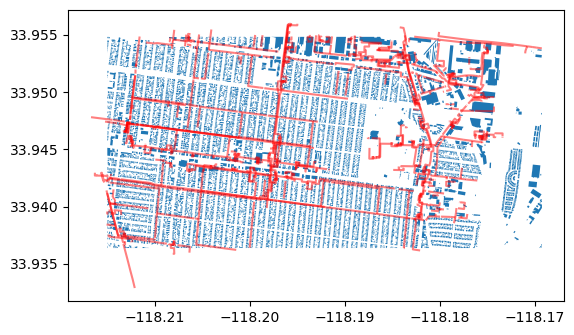

In [11]:
fig, ax = plt.subplots()
buildings_la.plot(ax=ax)
icacirc_segments.plot(ax=ax, alpha=0.5, color='red')

## Distribution Circuits

In [12]:
# load distribution circuits data
path = "../../../../capstone/electrigrid/data/utilities/sce_circuits/Distribution_circuits.geojson"
dist_circuits = gpd.read_file(path, bbox=la_bbox)

In [13]:
dist_circuits.head(3)

,note,sub_name,circuit_type,substation_voltage,sys_name,circuit_id,circuit_no,SHAPE__Length,circuit_voltage,objectid,circt_nam,geometry
0,NA,Calden 69/16 Kv,DISTRIBUTION,69/16 kV,Laguna Bell 220/66 System,2130054,00691,33755.237757,16.0,55,Ardmore,"MULTILINESTRING ((-118.23203 33.96205, -118.23..."
1,NA,Brewster 16/4 Kv,DISTRIBUTION,16/4 kV,Lighthipe 220/66 System,2131548,00270,27848.942906,4.0,125,Alberta,"MULTILINESTRING ((-118.19207 33.93552, -118.19..."
2,NA,Fernwood 69/16 Kv,DISTRIBUTION,69/16 kV,Lighthipe 220/66 System,2136701,01110,51906.086488,16.0,381,Barlow,"MULTILINESTRING ((-118.21228 33.93099, -118.21..."


In [14]:
dist_circuits.columns

Index(['note', 'sub_name', 'circuit_type', 'substation_voltage', 'sys_name',
       'circuit_id', 'circuit_no', 'SHAPE__Length', 'circuit_voltage',
       'objectid', 'circt_nam', 'geometry'],
      dtype='object')

In [33]:
print(f"Unique Distribution Circuits: {dist_circuits['circt_nam'].unique()}\n")
print(f"Length: {len(dist_circuits['circt_nam'].unique())}")

Unique Distribution Circuits: ['Ardmore' 'Alberta' 'Barlow' 'Colyer' 'Deeble' 'Duncan' 'Donald'
 'Home Gardens' 'Cyanide' 'Evergreen' 'Maas' 'Pinehurst' 'Nebraska'
 'Purex' 'Salt Lake' 'Samar' 'Prince' 'Missouri' 'Tweedy' 'Parafine'
 'Webbwood' 'Rheem' 'Walter' 'Whitsett' 'Wilcox' 'I-Beam']

Length: 26


<Axes: >

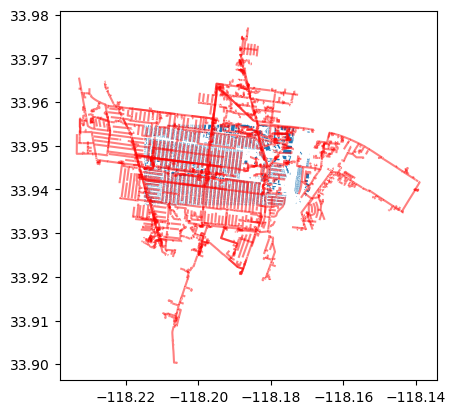

In [15]:
fig, ax = plt.subplots()
buildings_la.plot(ax=ax)
dist_circuits.plot(ax=ax, alpha=0.5, color='red')

# Side-by-side Comparison

<Axes: >

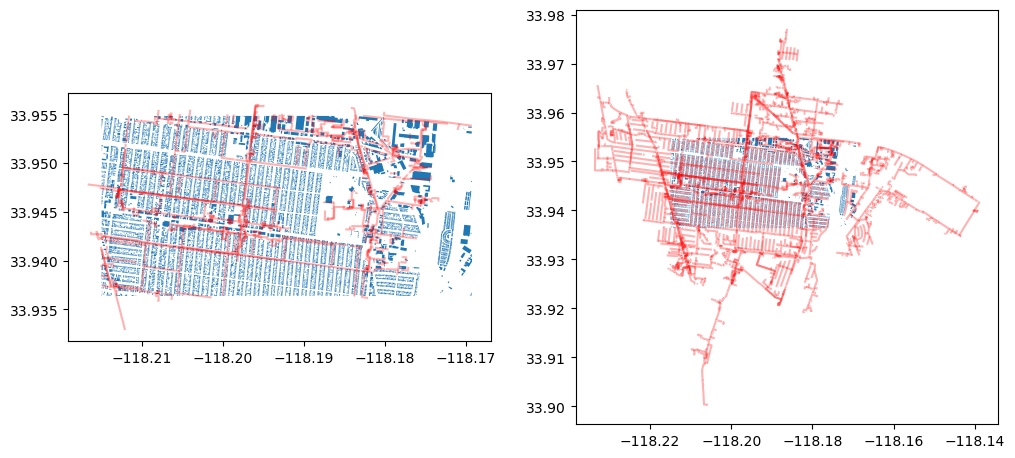

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

buildings_la.plot(ax=axes[0])
buildings_la.plot(ax=axes[1])

icacirc_segments.plot(ax=axes[0], alpha=0.3, color='red')
dist_circuits.plot(ax=axes[1], alpha=0.3, color='red')

# Interactive map
To see these better, plot both layers on an interactive map.

In [ ]:
# initilize folium map with specified center location
m = folium.Map(location=(33.945585, -118.192034))

# building layer
folium.GeoJson(data=buildings_la, name="buildings").add_to(m)

# utilities layer
ica_popup = folium.GeoJsonPopup(fields=['objectid', 'circuit_name', 'substation_name', 'circuit_voltage', 'ica_overall_load'])
dist_popup = folium.GeoJsonPopup(fields=['sys_name', 'circt_nam'])

folium.GeoJson(data=icacirc_segments, popup=ica_popup, highlight_function=lambda feature: {"color":"lightgreen"},
               style_function=lambda feature: {"color":"green", "weight":6}, name="ica segments").add_to(m)

folium.GeoJson(data=dist_circuits, popup=dist_popup, highlight_function=lambda feature: {"color":"orange"},
               style_function=lambda feature: {"color":"red", "weight":3}, name="distribution circuits").add_to(m)

# layer control
folium.LayerControl().add_to(m)
m

# Combining both circuits

In [18]:
# check unique names in each layer
ica_circ_names = set(icacirc_segments['circuit_name'].dropna().unique())
dist_circ_names = set(dist_circuits['circt_nam'].dropna().unique())

print(f"ICA circuits: {len(ica_circ_names)}")
print(f"Distribution circuits: {len(dist_circ_names)}")
print(f"Matching: {len(ica_circ_names & dist_circ_names)}")

ICA circuits: 17
Distribution circuits: 26
Matching: 17


Continue with spatial join, there are extra distribution circuits that don't have ICA data yet.

In [19]:
# convert to projected crs first
ica_proj = icacirc_segments.to_crs("EPSG:26911")
dist_proj = dist_circuits.to_crs("EPSG:26911")

In [20]:
dist_proj.crs

<Projected CRS: EPSG:26911>
Name: NAD83 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 120°W and 114°W - onshore and offshore. Canada - Alberta; British Columbia; Northwest Territories; Nunavut. United States (USA) - California; Idaho; Nevada, Oregon; Washington.
- bounds: (-120.0, 30.88, -114.0, 83.5)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Attribute join with `.merge()`

In [23]:
circ_attr_merge = dist_proj.merge(
    ica_proj.drop(columns='geometry'),
    left_on='circt_nam',
    right_on='circuit_name',
    how='left',
    suffixes=('', '_ica')
)

In [24]:
circ_attr_merge.head()

,note,sub_name,circuit_type,substation_voltage,sys_name,circuit_id,circuit_no,SHAPE__Length,circuit_voltage,objectid,circt_nam,geometry,download_link_microgrid,changed_date,lgp_flag,most_limiting_factor,circuit_name,section_id,node_id,phase,circuit_voltage_ica,substation_name,substation_voltage_ica,system_name,ica_overall_load,ica_overall_pv_op_flex,ica_overall_pv,uniform_generation_op_flex,uniform_generation,note_ica,download_link,disclaimer,objectid_ica,Shape__Length
0,NA,Calden 69/16 Kv,DISTRIBUTION,69/16 kV,Laguna Bell 220/66 System,2130054,00691,33755.237757,16.0,55,Ardmore,"MULTILINESTRING ((386170.878 3758631.859, 3861...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NA,Brewster 16/4 Kv,DISTRIBUTION,16/4 kV,Lighthipe 220/66 System,2131548,00270,27848.942906,4.0,125,Alberta,"MULTILINESTRING ((389828.504 3755646.356, 3898...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NA,Fernwood 69/16 Kv,DISTRIBUTION,69/16 kV,Lighthipe 220/66 System,2136701,01110,51906.086488,16.0,381,Barlow,"MULTILINESTRING ((387954.963 3755166.617, 3879...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NA,Bullis 69/16 Kv,DISTRIBUTION,69/16 kV,Lighthipe 220/66 System,2142712,03840,114441.426537,16.0,664,Colyer,"MULTILINESTRING ((390324.301 3754995.293, 3903...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NA,South Gate 16/4 Kv,DISTRIBUTION,16/4 kV,Laguna Bell 220/66 System,2148112,04760,13984.526650,4.0,906,Deeble,"MULTILINESTRING ((388327.452 3757176.903, 3883...",https://Microgrid.sce.com/icafiledownload/mode...,06/08/2025,No,Generation - Thermal,Deeble,236487097.0,241836463,3,4,South Gate,16/4 kV,Laguna Bell 220/66 System,0,.4852,1.0,.3527,1.0646,None,https://drpep.sce.com/icafiledownload/models/w...,N,52170.0,40.611026


`.merge()` explanation (left join):
1. **Circuit match:** Distribution line gets all ICA columns attached.
2. **Distribution circuit exists, ICA circuit doesn't:** Distribution row kept, ICA columns are `NaN`
3. **ICA circuit exists, distribution circuit doesn't:** Row dropped entirely

Using interactive map to compare join methods.

In [ ]:
# initilize folium map with specified center location
m = folium.Map(location=(33.945585, -118.192034), zoom_start=13)

# building layer
folium.GeoJson(data=buildings_la, name="buildings").add_to(m)

# combined circuits layer
circuit_popup = folium.GeoJsonPopup(fields=['circuit_name', 'circt_nam', 'sub_name', 'circuit_voltage', 'ica_overall_load'])

folium.GeoJson(data=circ_attr_merge, popup=circuit_popup, highlight_function=lambda feature: {"color":"lightgreen"},
               style_function=lambda feature: {"color":"purple", "weight":3}, name="circuits joined").add_to(m)

# layer control
folium.LayerControl().add_to(m)
m